# #Implement a KNN model For zoo dataset to classify the animals in to categorie

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv("Zoo.csv")
df

,animalname,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [3]:
df.isnull().sum()

animalname    0
hair          0
feathers      0
eggs          0
milk          0
airborne      0
aquatic       0
predator      0
toothed       0
backbone      0
breathes      0
venomous      0
fins          0
legs          0
tail          0
domestic      0
catsize       0
type          0
dtype: int64

In [4]:
####Dummies########
dummies=pd.get_dummies(df["animalname"])
dummies

,aardvark,antelope,bass,bear,boar,buffalo,calf,carp,catfish,cavy,...,tuatara,tuna,vampire,vole,vulture,wallaby,wasp,wolf,worm,wren
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
99,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [5]:
df1=pd.concat([df,dummies],axis=1)
df1

,animalname,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,...,tuatara,tuna,vampire,vole,vulture,wallaby,wasp,wolf,worm,wren
0,aardvark,1,0,0,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,antelope,1,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,bass,0,0,1,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,bear,1,0,0,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,boar,1,0,0,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0
97,wasp,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
98,wolf,1,0,0,1,0,0,1,1,1,...,0,0,0,0,0,0,0,1,0,0
99,worm,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [6]:

df2=df1.drop(["animalname"],axis=1)
df2

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,...,tuatara,tuna,vampire,vole,vulture,wallaby,wasp,wolf,worm,wren
0,1,0,0,1,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,...,0,0,0,0,0,1,0,0,0,0
97,1,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
98,1,0,0,1,0,0,1,1,1,1,...,0,0,0,0,0,0,0,1,0,0
99,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [7]:

labels=df2.iloc[:,16]
features=df2.drop(["type"],axis=1)

In [8]:
def norm_func(i):
    x=(i-i.min()/i.max()-i.min())
    return(x)
data=norm_func(features)

In [9]:
#######Data Spliting##########
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(data,labels,test_size=0.2)

In [10]:
from sklearn.neighbors import KNeighborsClassifier as KN
model=KN(n_neighbors=5)
model.fit(X_train,Y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [11]:
####Train Accuracy############
Train_acc=np.mean(model.predict(X_train)==Y_train)
Train_acc

0.9375

In [12]:
####Test Accuracy########
Test_acc=np.mean(model.predict(X_test)==Y_test)
Test_acc

0.9523809523809523

In [13]:
model1=KN(n_neighbors=6)
model1.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [14]:

#####Train Accuracy#########
train_acc1=np.mean(model1.predict(X_train)==Y_train)

train_acc1

0.9

In [15]:
###test Accuracy#####
test_acc1=np.mean(model1.predict(X_test)==Y_test)
test_acc1

0.9047619047619048

In [16]:
acc=[]

In [17]:
#####decide k values
for i in range(6,50,2):
     model1=KN(n_neighbors=i)
     model1.fit(X_train,Y_train)
     train_accuracy=np.mean(model1.predict(X_train)==Y_train)
     test_accuracy=np.mean(model1.predict(X_test)==Y_test)
     acc.append([train_accuracy,test_accuracy])

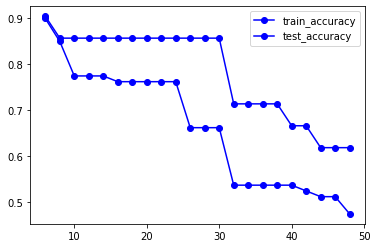

In [18]:
plt.plot(np.arange(6,50,2),[i[0] for i in acc],"bo-")
plt.plot(np.arange(6,50,2),[i[1] for i in acc],"bo-")
plt.legend(["train_accuracy", "test_accuracy"])

In [19]:
#######Select K=17############
model_fin=KN(n_neighbors=24)
model_fin.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=24, p=2,
                     weights='uniform')

In [22]:
train_fin=np.mean(model_fin.predict(X_train)==Y_train)
train_fin

0.7625

In [21]:
test_fin=np.mean(model_fin.predict(X_test)==Y_test)
test_fin

0.8571428571428571